In [1]:
from dpks.quant_matrix import QuantMatrix
from dpks.classification import Classifier

/home/erikh/dpks/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv")



In [3]:
quantified_data = (
    qm.normalize(
        method="mean",
    )
    .quantify(method="top_n")
)


In [4]:
params = {
        'min_child_weight': [0.01, 0.1, 0.5, 1, 5, 10, 25],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 6, 7,8,9,10],
        "learning_rate": [0.0001,0.001, 0.01, 0.1, 1],
        "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
        "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
        }

quantified_data.classify(classifier="xgboost", shap_algorithm="tree", run_rfe = True, rfe_min_features_to_select=5, rfe_step=10, run_param_search=True, param_grid=params, random_state=42, n_iter=1000)
quantified_data.clf.best_params

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated

{'subsample': 1.0,
 'reg_lambda': 0.1,
 'reg_alpha': 0.1,
 'min_child_weight': 0.1,
 'max_depth': 6,
 'learning_rate': 0.001,
 'gamma': 1,
 'colsample_bytree': 0.2}

In [5]:
quantified_data.to_df()

,Protein,SHAP,FeatureRank,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
0,P08603,0.000318,3.0,27.917160,26.200732,25.975755,26.515251,26.439237,26.582008,26.533406,...,26.737434,26.750760,26.771225,26.411031,26.442979,26.512285,26.672639,26.642845,27.336391,26.863229
1,P02671,0.000348,6.0,30.908137,30.832304,30.566479,30.734064,31.100094,30.182586,29.349591,...,30.349528,30.275675,30.712801,28.009665,29.308227,29.345303,29.498104,30.048675,30.576106,29.977439
2,P01042,0.000384,9.0,25.364128,25.234319,25.136428,25.497528,25.650704,26.249714,26.467688,...,26.105971,26.274201,26.120931,26.173301,26.105543,26.162973,26.179120,26.049352,27.268797,26.488321
3,P00450,0.000331,8.0,27.333235,27.645029,27.405650,27.461382,27.365972,27.385601,27.124483,...,27.483159,27.586267,27.557639,27.014641,27.331685,27.714976,27.694537,27.852459,27.574303,27.613746
4,P05156,0.000228,7.0,23.451795,23.645933,23.349888,23.595948,23.729965,24.099617,24.086203,...,23.862439,23.755281,23.964620,23.557492,23.183517,23.507872,23.519149,23.586519,24.327400,23.881691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,P07333,0.000000,47.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.512752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
550,Q06323,0.000000,50.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.150877,18.086225,0.000000,0.000000,19.517408,0.000000,17.283127
551,P16035,NaN,NaN,0.000000,19.124122,20.428224,19.840918,20.065922,19.232781,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
552,O95633,NaN,NaN,0.000000,0.000000,16.563512,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.054630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df = quantified_data.to_df()
df[df['Protein'] == 'P59665'] 

,Protein,SHAP,FeatureRank,TM_P1911_190,TM_P1911_191,TM_P1911_192,TM_P1911_193,TM_P1911_194,TM_P1911_196,TM_P1911_197,...,TM_M2012_190,TM_M2012_191,TM_M2012_192,TM_M2012_196,TM_M2012_197,TM_M2012_198,TM_M2012_199,TM_M2012_200,TM_M2012_202,TM_M2012_203
232,P59665,0.01936,1.0,24.085189,24.262046,23.991617,24.28774,24.008942,23.486835,23.267737,...,23.391273,23.092243,23.008705,27.251451,26.952818,26.774372,26.392491,26.318986,25.286124,25.5447


Text(0, 0.5, 'SHAP')

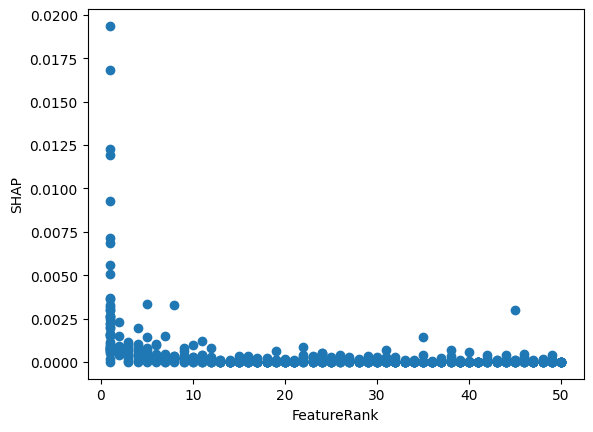

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['FeatureRank'], df['SHAP'])
plt.xlabel('FeatureRank')
plt.ylabel('SHAP')

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

def _generate_data_matrices(
     quantitative_data: QuantMatrix, scale: bool
) -> tuple:
    le = LabelEncoder()
    Y = le.fit_transform(quantitative_data.quantitative_data.var["group"].values)
    X = quantitative_data.quantitative_data.X.copy().transpose()
    X = np.nan_to_num(X, copy=True, nan=0.0)
    if scale:
        X = StandardScaler().fit_transform(X)
    return X, Y

scale = True
X, Y = _generate_data_matrices(quantified_data, scale)

In [9]:
clf = Classifier(quantified_data.clf.classifier)
clf.cross_validation(X,Y,k_folds=5)
clf.scores

array([0.925     , 0.925     , 0.82051282, 0.69230769, 0.79487179])

This should equals the height of the Feature 232-bar: 0.014937195
This should equals the height of the Feature 148-bar: 0.0057793884


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


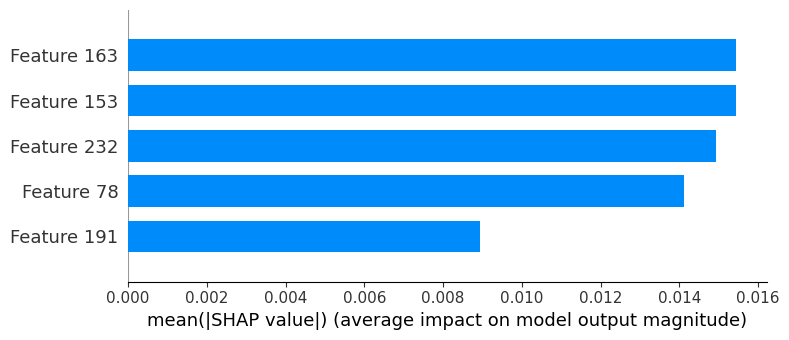

In [10]:
clf.fit(X,Y)
quantified_data.quantitative_data.obs['SHAP']= clf.feature_importances_
print("This should equals the height of the Feature 232-bar:", quantified_data.quantitative_data.obs['SHAP'][232])
print("This should equals the height of the Feature 148-bar:", quantified_data.quantitative_data.obs['SHAP'][148])
import shap

shap.summary_plot(clf.shap_values, X, max_display=5, plot_type='bar')

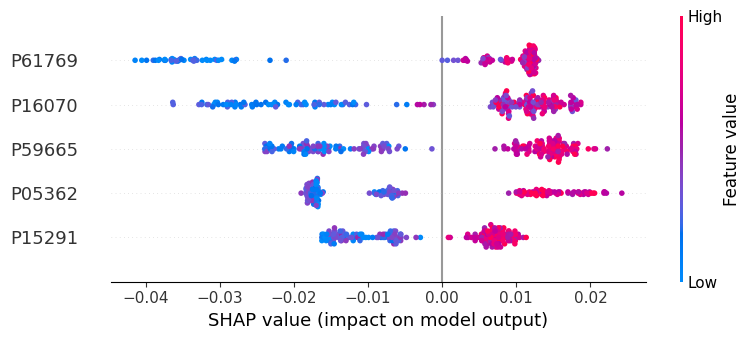

In [11]:
shap.summary_plot(clf.shap_values, X, max_display=5, feature_names = quantified_data.quantitative_data.obs['Protein'])

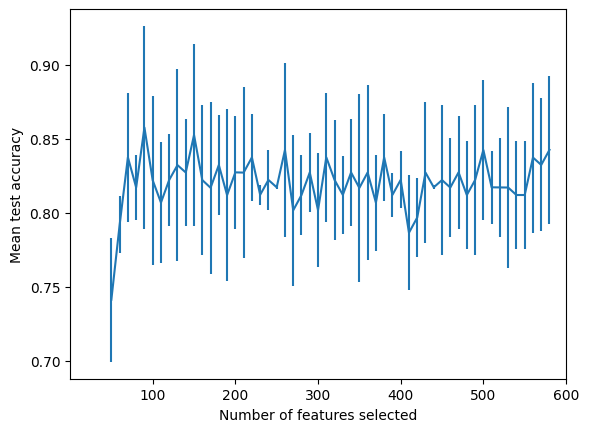

In [14]:
import matplotlib.pyplot as plt

rfe_results = quantified_data.selector.cv_results_
n_scores = len(rfe_results["mean_test_score"])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(5, n_scores+5),
    rfe_results["mean_test_score"],
    yerr=rfe_results["std_test_score"],
    
)
plt.xticks(plt.xticks()[0][1:], 
           labels=[int(_)*10 for _ in plt.xticks()[0][1:]])
plt.xlim([0,60])
plt.show()


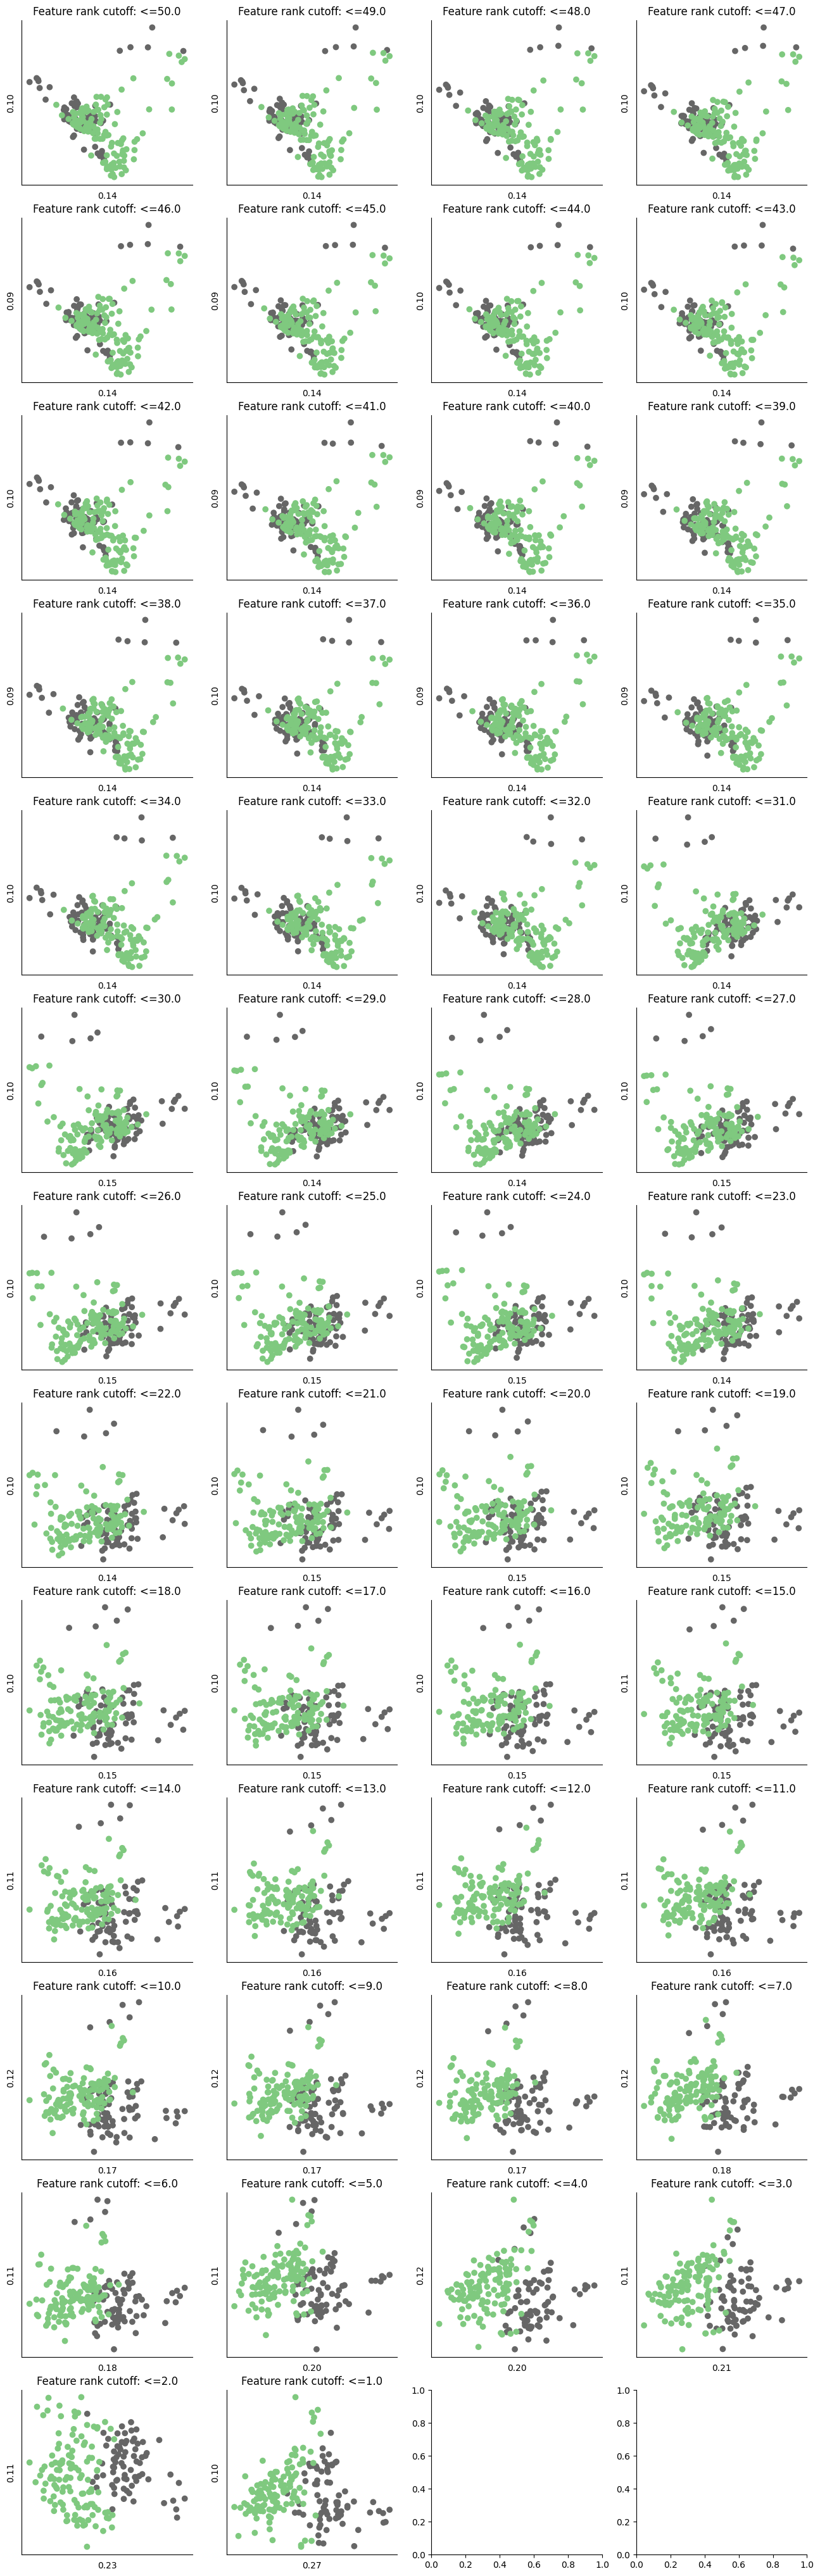

In [15]:
from sklearn import decomposition
import seaborn as sns

qdf = quantified_data.to_df()
feature_ranks = qdf.FeatureRank.unique()
feature_ranks = sorted(feature_ranks, reverse=True)[1:]

samples1 = quantified_data.get_samples(group=1)
samples2 = quantified_data.get_samples(group=2)

y = [1 for _ in samples1] + [2 for _ in samples2]

fig, axs = plt.subplots(13, 4, figsize=(16, 52))
for ax, feature_rank in zip(axs.ravel(), feature_ranks):
    qdf_f = qdf[qdf.FeatureRank <= feature_rank]
    qdf_f = qdf_f[samples1+samples2]
    X = qdf_f.values.T
    X = StandardScaler().fit_transform(X)
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)
    explained_variance = pca.explained_variance_ratio_
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent_r)
    ax.set_title(f"Feature rank cutoff: <={feature_rank}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{explained_variance[0]:.2f}")
    ax.set_ylabel(f"{explained_variance[1]:.2f}")
    sns.despine()
plt.show()
    